# Mask R-CNN Demo

A quick intro to using the pre-trained model to detect and segment objects.

In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import imgaug.augmenters as iaa

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "models"))  # To find local version
import abnormalities_train

%matplotlib inline

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs\\abnormalities_train")

# Local path to trained weights file
CUSTOM_MODEL_PATH = os.path.join(ROOT_DIR, "logs\\abnormality\\mask_rcnn_abnormality_0030.h5")
# Download COCO trained weights from Releases if needed
# if not os.path.exists(CUSTOM_MODEL_PATH):
#     utils.download_trained_weights(CUSTOM_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "dataset\\Tufts Dental Database\\Radiographs")

In [2]:
print(MODEL_DIR)
print(CUSTOM_MODEL_PATH)
print(IMAGE_DIR)

C:\Users\pc\MyProjects\JupyterLabNotes\new\tdd-model\logs\abnormalities_train
C:\Users\pc\MyProjects\JupyterLabNotes\new\tdd-model\logs\abnormality\mask_rcnn_abnormality_0030.h5
C:\Users\pc\MyProjects\JupyterLabNotes\new\tdd-model\dataset\Tufts Dental Database\Radiographs


## Configurations


In [3]:
class InferenceConfig(abnormalities_train.AbnormalityConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                20
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

## Create Model and Load Trained Weights

In [4]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(CUSTOM_MODEL_PATH, by_name=True)

Instructions for updating:
Use fn_output_signature instead


## Class Names

The model classifies objects and returns class IDs, which are integer value that identify each class. Some datasets assign integer values to their classes and some don't. For example, in the MS-COCO dataset, the 'person' class is 1 and 'teddy bear' is 88. The IDs are often sequential, but not always. The COCO dataset, for example, has classes associated with class IDs 70 and 72, but not 71.

To improve consistency, and to support training on data from multiple sources at the same time, our ```Dataset``` class assigns it's own sequential integer IDs to each class. For example, if you load the COCO dataset using our ```Dataset``` class, the 'person' class would get class ID = 1 (just like COCO) and the 'teddy bear' class is 78 (different from COCO). Keep that in mind when mapping class IDs to class names.


In [5]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')

# #Update the class names in the order mentioned in the abnormalities_train.py file
class_names = ['BG', 'benign_cyst_neoplasia', 'malignant_neoplasia', 'inflammation', 'dysplasia', 'metabolic/systemic', 'trauma', 'developmental']

## Run Object Detection

In [6]:
## show image
# image = skimage.io.imread(os.path.join(IMAGE_DIR, '1009.JPG'))
# plt.imshow(image)
# plt.axis('off')
# plt.show()

In [7]:
## augment image
# # Define your augmentation sequence
# augmentation = iaa.Sequential([
#     iaa.Fliplr(0.5), # Horizontal flips with a 50% probability
#     iaa.Sometimes(.5, iaa.contrast.LinearContrast((0.5, 2.0))), # Adjust contrast
#     iaa.Sometimes(0.5, iaa.Crop(percent=(0.0, 0.1))), # Randomly crop the image
# ])
#
# # Number of times to apply the augmentation
# num_augmentations = 10
#
# # Create a figure with subplots to display the augmented images
# plt.figure(figsize=(15, 3))
# for i in range(num_augmentations):
#     # Apply the augmentation sequence to the image
#     augmented_image = augmentation(image=image)
#
#     # Plot the augmented image in a subplot
#     plt.subplot(2, 5, i + 1)  # Create a 2x5 grid of subplots
#     plt.imshow(augmented_image)
#     plt.axis('off')
#
# plt.show()

Processing 1 images
image                    shape: (840, 1615, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1615.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


C:\Users\pc\anaconda3\envs\JupyterLabNotes\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


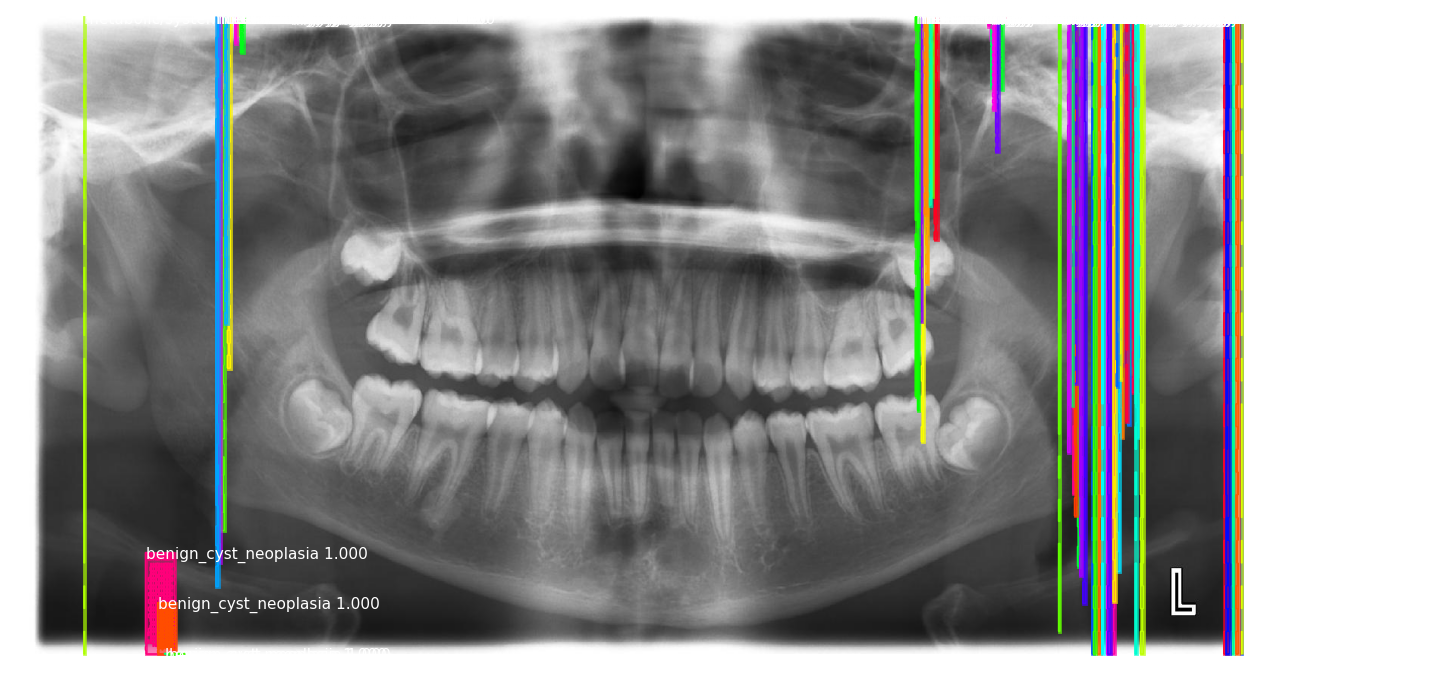

Processing 1 images
image                    shape: (840, 1615, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1615.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


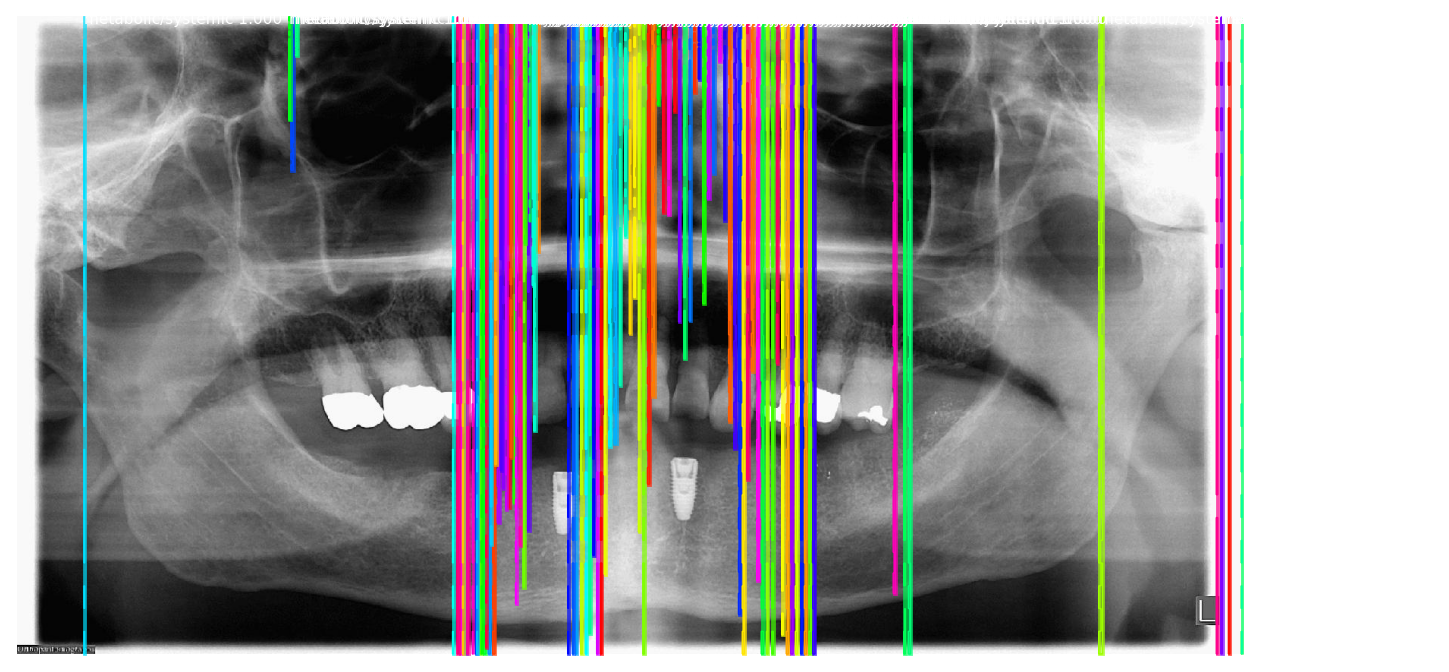

Processing 1 images
image                    shape: (840, 1615, 3)        min:   21.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1615.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


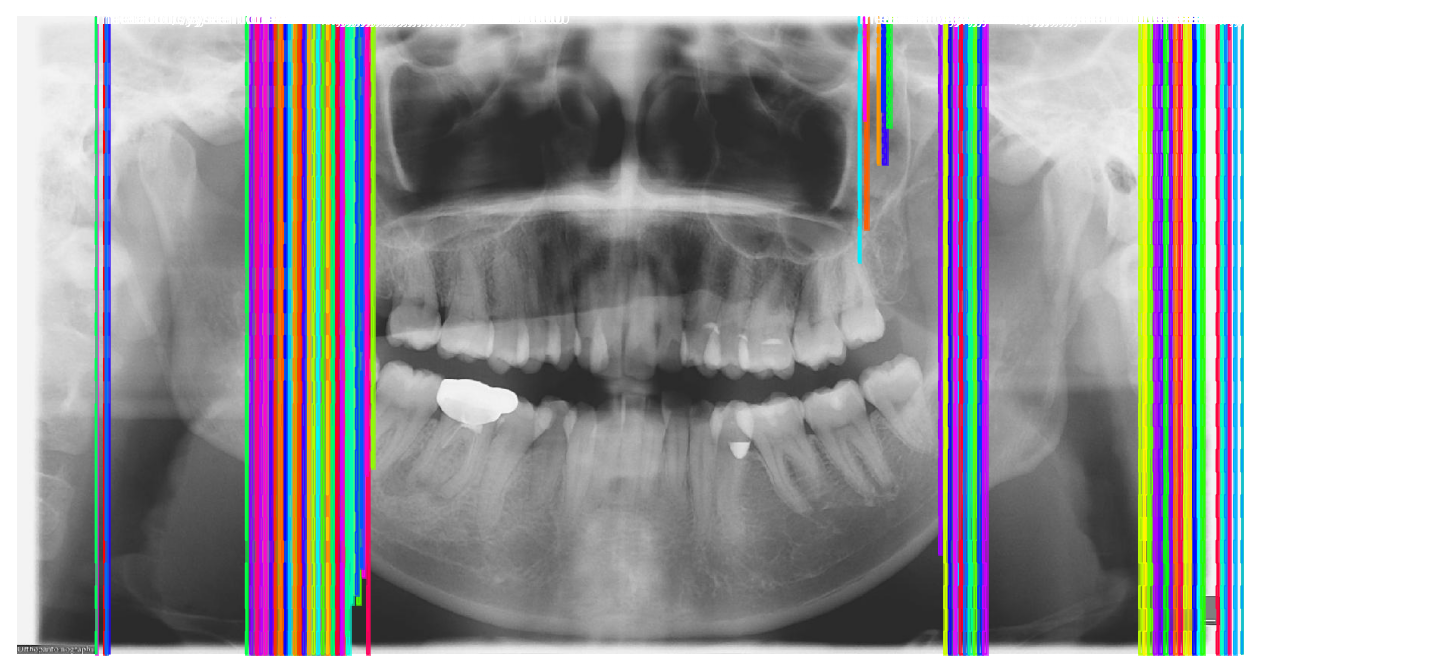

Processing 1 images
image                    shape: (840, 1615, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1615.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


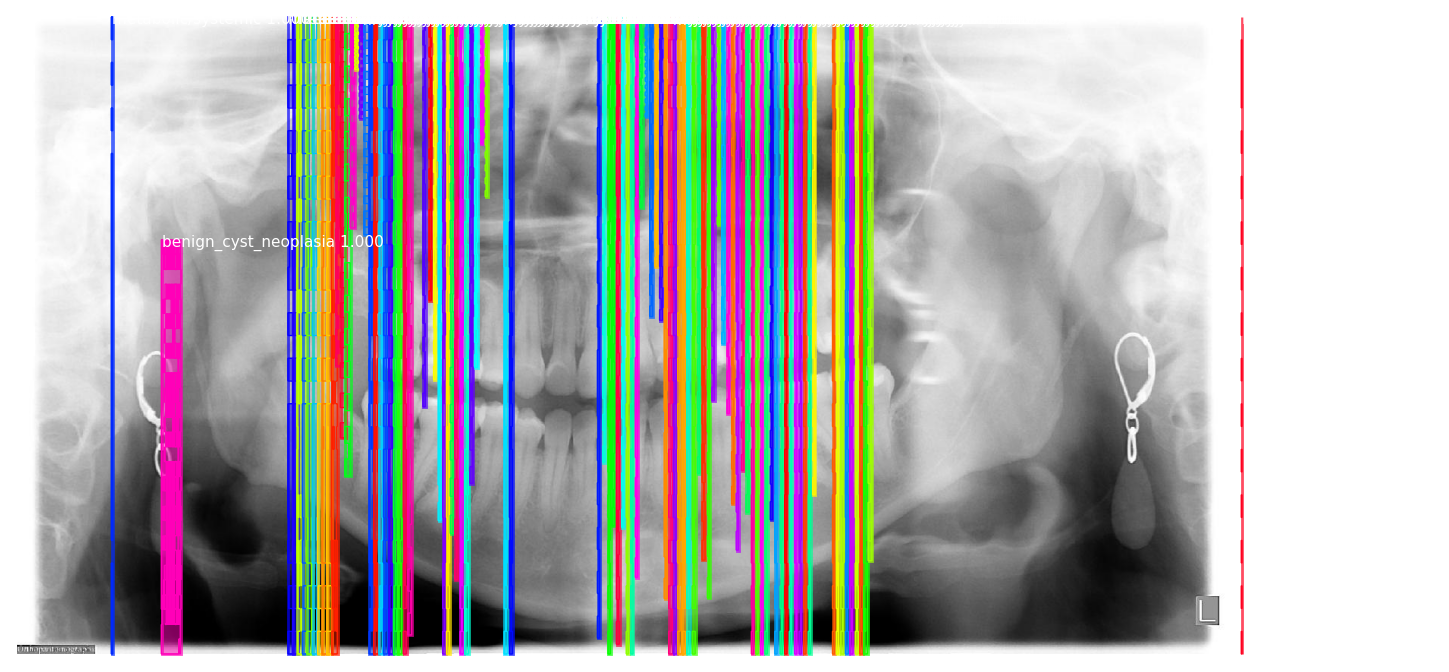

CPU times: total: 1min 17s
Wall time: 1min 19s


In [6]:
%%time
# Load a random image from the images folder
# file_names = next(os.walk(IMAGE_DIR))[2]
# image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
image_ids = ['217.JPG', '72.JPG', '84.JPG', '105.JPG',]
for id_ in image_ids:
    image = skimage.io.imread(os.path.join(IMAGE_DIR, id_))

    # Run detection
    results = model.detect([image], verbose=1)

    # Visualize results
    r = results[0]
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                                class_names, r['scores'])